## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2024-03-29 07:38:34.597494: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-29 07:38:35.807089: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    
    class_names=None,
    color_mode="rgb",
    batch_size=32, # change to speed up traing size, original: 32
    
    image_size=(128, 128), 
    
    shuffle=True, # reduces the biasness
    seed=None,
    validation_split=None,
    subset=None,
    
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    #data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


2024-03-29 07:38:46.811301: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-29 07:38:47.010644: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-29 07:38:47.010751: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-29 07:38:47.013366: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-29 07:38:47.013464: I external/local_xla/xla/stream_executor

## Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    
    class_names=None,
    color_mode="rgb",
    batch_size=32, # change to speed up traing size, original: 32
    
    image_size=(128, 128), 
    
    shuffle=True, # reduces the biasness
    seed=None,
    validation_split=None,
    subset=None,
    
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    #data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x, y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[126.75 113.75 131.75]
   [128.   115.   133.  ]
   [140.   127.   145.  ]
   ...
   [167.25 156.25 170.25]
   [165.5  154.5  168.5 ]
   [172.25 161.25 175.25]]

  [[130.5  117.5  135.5 ]
   [131.5  118.5  136.5 ]
   [140.   127.   145.  ]
   ...
   [168.   157.   171.  ]
   [168.   157.   171.  ]
   [177.25 166.25 180.25]]

  [[136.   123.   141.  ]
   [137.   124.   142.  ]
   [139.25 126.25 144.25]
   ...
   [166.75 155.75 169.75]
   [168.5  157.5  171.5 ]
   [171.75 160.75 174.75]]

  ...

  [[104.75  88.75 101.75]
   [104.75  88.75 101.75]
   [102.75  86.75  99.75]
   ...
   [134.75 122.75 134.75]
   [123.25 111.25 123.25]
   [109.75  97.75 109.75]]

  [[113.5   97.5  110.5 ]
   [104.5   88.5  101.5 ]
   [ 97.25  81.25  94.25]
   ...
   [117.75 105.75 117.75]
   [140.75 128.75 140.75]
   [123.   111.   123.  ]]

  [[103.75  87.75 100.75]
   [106.    90.   103.  ]
   [104.    88.   101.  ]
   ...
   [131.5  119.5  131.5 ]
   [129.5  117.5  129.5 ]
   [119.75 107.75 11

## Summary of part 1
- Imported Libraries
- Training preprocessing
    - batch size 128 (32 in video)
    - label = "inferred" - indicates to take all directory as label of a class
    - label_mode = "categorical" - more than 2 class problem, "binary" if 2
    - color_mode = "rgb"
    - image_size = 128 x 128 pixels
- validation data preprocessing
    - same with training preprocessing
- Shape of X:
    - shape=(128, 128, 128, 3), dtype=float32) (128, 128, 128, 3)
    - 128 = batch size, at a time 128 images feeded
    - 128 = height
    - 128 = width
    - 3 = color (rgb)
- Shape of Y:
    -  shape=(128, 38), dtype=float32) (128, 38)
    -  corresponding 128 labels

## Building Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
## Build convolution layer

In [9]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3])) #kernel size = size of filter
model.add(Conv2D(filters=32, kernel_size=3, activation='relu')) #kernel size = size of filter
model.add(MaxPool2D(pool_size=2, strides=2))

/home/kaynerodrigo/anaconda3/envs/py31/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')) #kernel size = size of filter
model.add(Conv2D(filters=64, kernel_size=3, activation='relu')) #kernel size = size of filter
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')) #kernel size = size of filter
model.add(Conv2D(filters=128, kernel_size=3, activation='relu')) #kernel size = size of filter
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')) #kernel size = size of filter
model.add(Conv2D(filters=256, kernel_size=3, activation='relu')) #kernel size = size of filter
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')) #kernel size = size of filter
model.add(Conv2D(filters=512, kernel_size=3, activation='relu')) #kernel size = size of filter
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
model.add(Dropout(0.25)) # to avoid overfitting

In [15]:
model.add(Flatten())

In [16]:
# units = neuron
model.add(Dense(units=1500, activation='relu'))

In [17]:
model.add(Dropout(0.4)) # to avoid overfitting

In [18]:
# Output Layer
model.add(Dense(units=38, activation='softmax')) # result in probability form

## Compiling Model

## To avoid Overshooting
1. Choose small learning rate default is 0.001, we changed it to 0.0001 (overshooting)
2. There may be a chance of underfitting, so increase number of neuron (underfitting = unable to capture some unseen values)
3. Add more convolution layer to extract more feature from images

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [21]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10


I0000 00:00:1711669132.415472     861 service.cc:145] XLA service 0x7f48a00052e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1711669132.415866     861 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-03-29 07:38:52.478428: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-29 07:38:52.787260: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900
I0000 00:00:1711669134.369284    1001 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2601', 4 bytes spill stores, 4 bytes spill loads



   1/2197 ━━━━━━━━━━━━━━━━━━━━ 10:31:09 17s/step - accuracy: 0.0000e+00 - loss: 5.6722

I0000 00:00:1711669147.503100     861 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2196/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4091 - loss: 2.1137

I0000 00:00:1711669273.794011    1669 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2601', 4 bytes spill stores, 4 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4092 - loss: 2.1134

I0000 00:00:1711669285.506167    1786 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_177', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1711669285.526687    1787 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_177', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1711669285.624002    1784 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_177', 408 bytes spill stores, 408 bytes spill loads

I0000 00:00:1711669294.916123    1856 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_177', 112 bytes spill stores, 112 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 166s 68ms/step - accuracy: 0.4093 - loss: 2.1130 - val_accuracy: 0.8290 - val_loss: 0.5359
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 0.8416 - loss: 0.5059 - val_accuracy: 0.8894 - val_loss: 0.3625
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 0.9048 - loss: 0.2995 - val_accuracy: 0.9390 - val_loss: 0.1999
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - accuracy: 0.9366 - loss: 0.1972 - val_accuracy: 0.9282 - val_loss: 0.2257
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 0.9515 - loss: 0.1465 - val_accuracy: 0.9441 - val_loss: 0.1851
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 0.9630 - loss: 0.1144 - val_accuracy: 0.9538 - val_loss: 0.1550
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 0.9707 - loss: 0.0923 - val_accuracy: 0.9618 - val_loss: 0.1282
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 0.9754 - lo

## Summary of part 4
- Overshooting of loss function
- decrease the learning rate from 0.001 to 0.0001
- Increased neurons from 1024 to 1500
- Added convolution layer (confused due to lack of feature)
- Changed padding parameter (

## Model Evaluation on Training Set

In [22]:
# Model evaluation on Training set
train_loss, train_acc = model.evaluate(training_set)

2195/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9887 - loss: 0.0344

I0000 00:00:1711670530.254559    7606 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_177', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1711670530.457228    7604 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_177', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1711670530.460032    7603 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_177', 128 bytes spill stores, 128 bytes spill loads

I0000 00:00:1711670530.573200    7601 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_177', 420 bytes spill stores, 420 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.9887 - loss: 0.0343


In [23]:
# prints loss and accuracy on train
print(train_loss, train_acc)

0.029979703947901726 0.9902553558349609


In [24]:
# Model evaluation on Validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9641 - loss: 0.1215


In [25]:
# prints loss and accuracy on validation
print(val_loss, val_acc)

0.11786460131406784 0.9654564261436462


# Saving Model

In [26]:
# saving model as h5 file, .keras is another
model.save("trained_model.keras")

In [27]:
training_history.history

{'accuracy': [0.6043673157691956,
  0.8609716296195984,
  0.9138203263282776,
  0.9398676753044128,
  0.9549328088760376,
  0.9645636081695557,
  0.971747636795044,
  0.9763568043708801,
  0.9783768653869629,
  0.9808236956596375],
 'loss': [1.3456203937530518,
  0.440781831741333,
  0.2707449793815613,
  0.18664167821407318,
  0.13793504238128662,
  0.1098397895693779,
  0.0884450227022171,
  0.0744045227766037,
  0.06550697237253189,
  0.0600726380944252],
 'val_accuracy': [0.8289893269538879,
  0.8894263505935669,
  0.9389938712120056,
  0.9282380938529968,
  0.9441156387329102,
  0.9537901282310486,
  0.9617573618888855,
  0.956407904624939,
  0.9653995037078857,
  0.9654564261436462],
 'val_loss': [0.5359181761741638,
  0.36246219277381897,
  0.19994767010211945,
  0.225749671459198,
  0.1851375550031662,
  0.15503501892089844,
  0.12824560701847076,
  0.16266968846321106,
  0.11694822460412979,
  0.11791086196899414]}

## Recording History in Json

In [28]:
# Recording History in JSON
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history, f)

## Accuracy Visualization

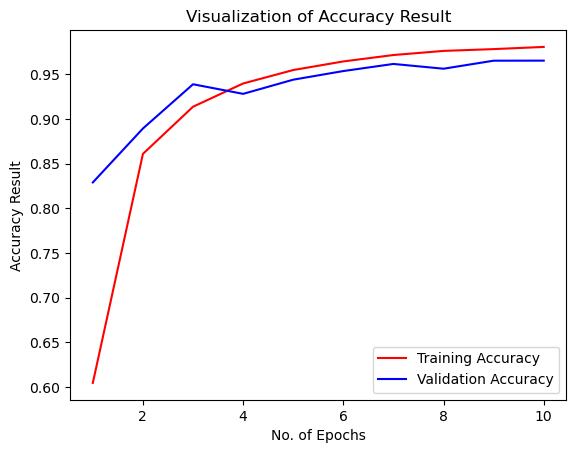

In [29]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label="Training Accuracy")
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label="Validation Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Part 5 Summary
- Evaluated our model in training and validation set
    -  We got our training loss and training accuracy
    -  We got our validation loss and validation accuracy
    -  Used .keras to compress (not working)
    -  Added visualization


## Some other metrics for model evaluation

In [30]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    
    class_names=None,
    color_mode="rgb",
    batch_size=32, # change to speed up traing size, original: 32
    
    image_size=(128, 128), 
    
    shuffle=False, # all classes will be passed sequentially
    seed=None,
    validation_split=None,
    subset=None,
    
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    #data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step


(array([[9.9972671e-01, 6.0334457e-07, 5.0001393e-08, ..., 2.0894569e-10,
         5.4624993e-10, 2.5965130e-08],
        [9.9999964e-01, 6.2569532e-09, 1.6074917e-09, ..., 2.7506692e-15,
         5.7199857e-12, 2.2597453e-11],
        [9.9997020e-01, 1.1040336e-09, 1.9879143e-09, ..., 1.7779866e-16,
         9.3771683e-12, 4.0911041e-10],
        ...,
        [2.9798547e-10, 5.8549758e-13, 4.9511900e-10, ..., 3.1520726e-12,
         5.7012745e-10, 9.9999881e-01],
        [8.6260873e-11, 5.6282737e-14, 1.1599679e-10, ..., 1.7707802e-12,
         2.5989584e-11, 1.0000000e+00],
        [5.9654002e-13, 3.2175932e-14, 4.6869155e-13, ..., 2.3441796e-14,
         8.0028255e-11, 9.9998152e-01]], dtype=float32),
 (17572, 38))

In [33]:
# argmax = will extract the max value, axis = column wise
predicted_categories = tf.argmax(y_pred, axis=1) # returns the max value, 1 = column

In [34]:
predicted_categories 

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [35]:
#concat all the y in row-wise
true_categories = tf.concat([y for x,y in test_set], axis = 0)
true_categories

2024-03-29 08:02:31.690868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [36]:
Y_true = tf.argmax(true_categories, axis=1) 
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

## Precision & Recall

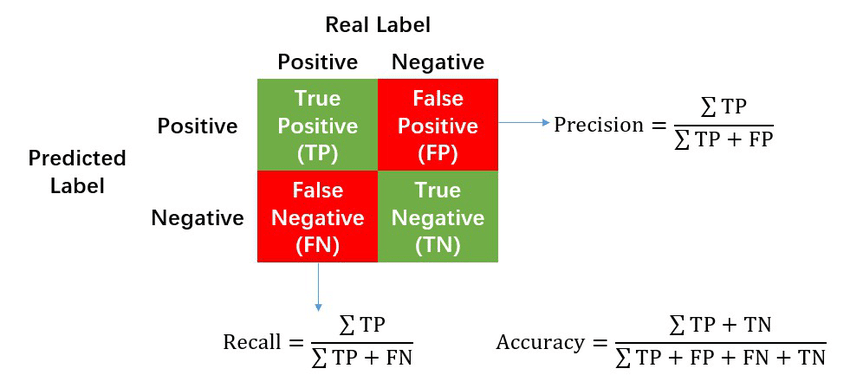

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
classification_report(Y_true, predicted_categories, target_names=class_name)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       1.00      0.86      0.92       504\n                                 Apple___Black_rot       0.99      0.95      0.97       497\n                          Apple___Cedar_apple_rust       0.98      0.89      0.93       440\n                                   Apple___healthy       0.96      0.95      0.95       502\n                               Blueberry___healthy       0.93      0.98      0.95       454\n          Cherry_(including_sour)___Powdery_mildew       0.96      0.98      0.97       421\n                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.96      0.94       410\n                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477\n               Corn_(maize)___Northern_Leaf_Blight       0.98      

## Part 6 Summary
- Accuracy score is not enough
- Copied valid data to test data since test data isn't complete
    - Does not used shuffle `shuffle = false` to have a sequential scan
- Used other evaluation method: precision, recall, f1-score
- added y_pred, argmax
<br><br>
- `precision` = finding all the true positives in all positive results
    - $precision = true positive / true positive + false positive$
    - prioritized when avoiding missing true positive result, given the positives<br><br>
- `recall` = finding all the true positives given in a pool of true positives and false negatives
    -  $recall = true positive / true positive + false negative$
    -  prioritized when avoiding incorrect negative labels<br><br>
- uses sklearn classification report to display results
- f1 = harmonic mean of precision and recall

In [39]:
cm = confusion_matrix(Y_true, predicted_categories)
display(cm)
cm.shape ## 38 pred categories 38 true categories

array([[433,   3,   0, ...,   0,   0,   0],
       [  0, 470,   1, ...,   0,   0,   0],
       [  0,   0, 390, ...,   0,   1,   1],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 432,   0],
       [  0,   0,   1, ...,   0,   0, 465]])

(38, 38)

## Confusion Matrix Visualization

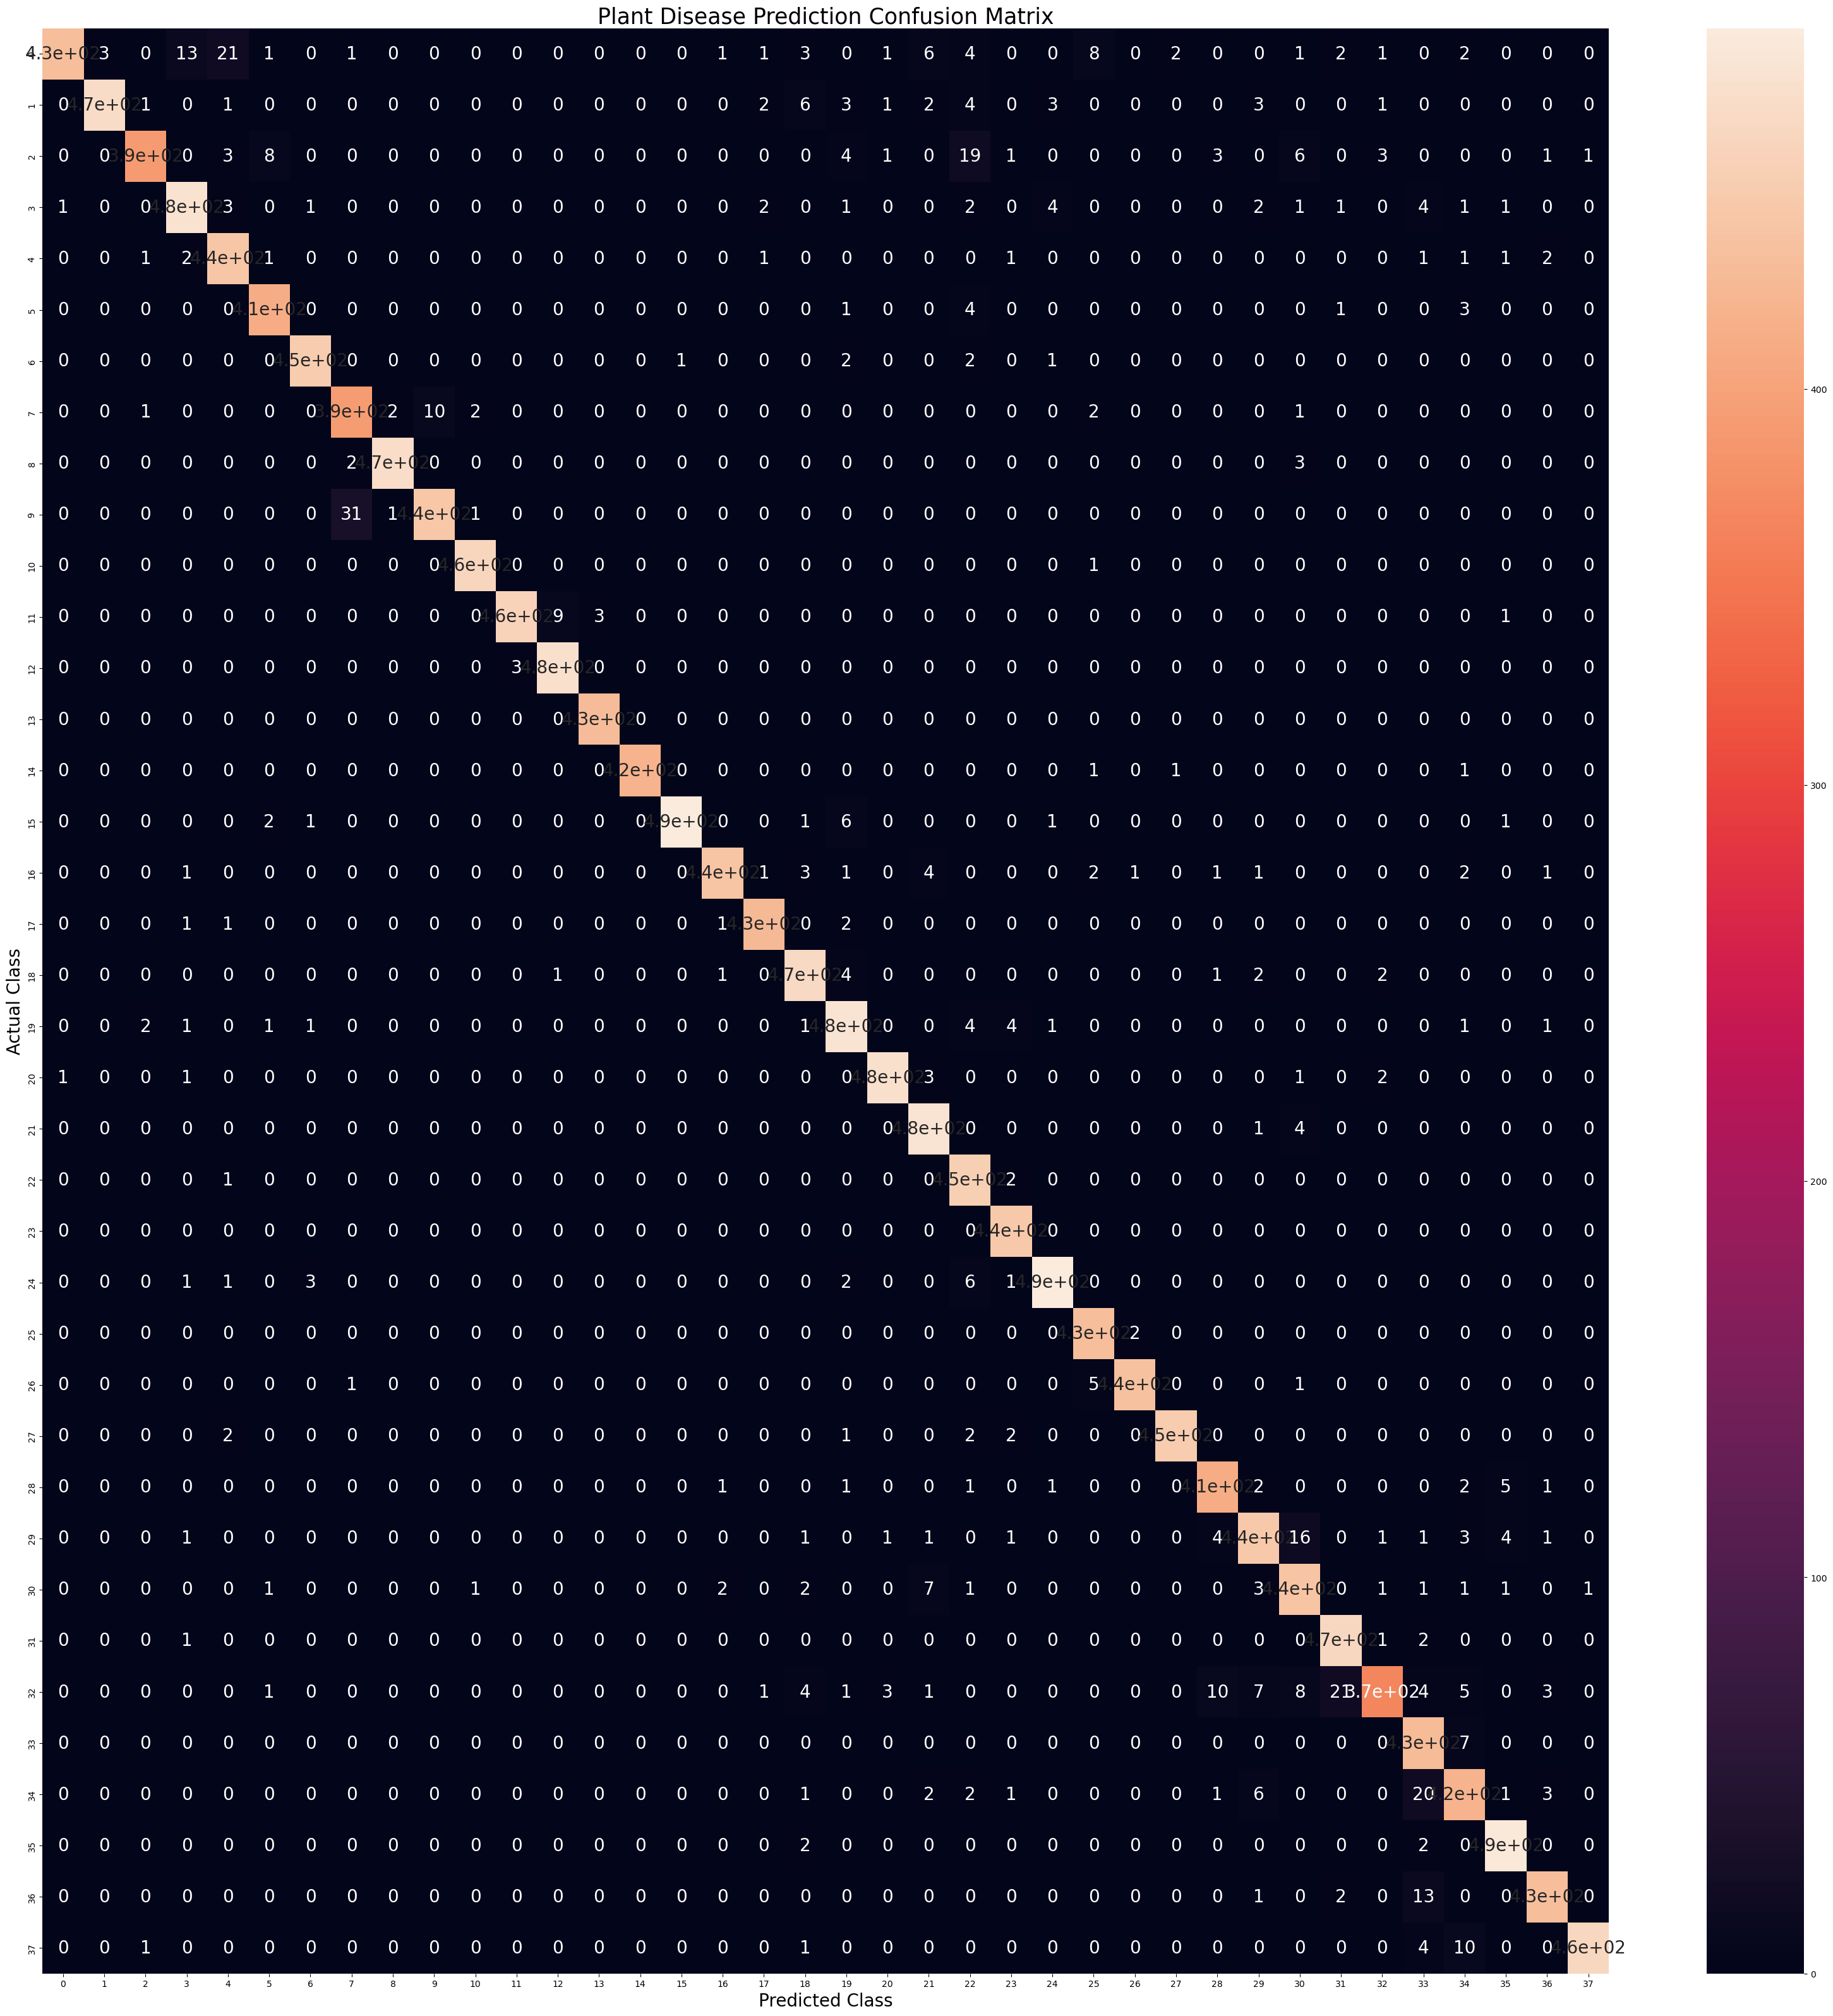

In [41]:
## uses seaborn
# increase size
plt.figure(figsize=(40, 40))
# heatmap
sns.heatmap(cm, annot=True, annot_kws={'size':20})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()